In [39]:
import pandas as pd

# read csv file
data = pd.read_csv('archive_export (1).csv')

In [40]:
data.head()

,date,rank,film,country,weekend_gross,distributor,weeks_on_release,number_of_cinemas,total_gross,week_gross
0,19800106,1,STAR TREK: THE MOTION PICTURE,NaN,649202.0,NaN,3,0,3790421,649202.0
1,19800106,2,THE BLACK HOLE,NaN,402872.0,NaN,3,0,2433346,402872.0
2,19800106,3,APOCALYPSE NOW,NaN,283714.0,NaN,3,0,1790568,283714.0
3,19800106,4,METEOR,NaN,25069.0,NaN,3,0,201553,25069.0
4,19800106,5,ROCKY II,NaN,22844.0,NaN,7,0,5454549,22844.0


In [41]:
# 1. Handling Missing Values

# Fill missing values in the 'country' and 'distributor' fields with "Unknown"
data['country'].fillna('Unknown', inplace=True)
data['distributor'].fillna('Unknown', inplace=True)

# Check for any other missing values
missing_values = data.isnull().sum()

print(missing_values)

date                 0
rank                 0
film                 0
country              0
weekend_gross        0
distributor          0
weeks_on_release     0
number_of_cinemas    0
total_gross          0
week_gross           0
dtype: int64

In [42]:
# 2. Data Format Conversion

# Convert the 'date' field to a date format
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')

# Check the converted date format
data['date'].head()

0   1980-01-06
1   1980-01-06
2   1980-01-06
3   1980-01-06
4   1980-01-06
Name: date, dtype: datetime64[ns]

In [43]:
# 3. Checking for Outliers

# Define a function to check if a column contains negative values
def check_negative_values(column_name):
    return data[data[column_name] < 0][column_name].count()

# Check for negative values in 'number_of_cinemas,' 'weekend_gross,' and 'weeks_on_release'
negative_values_count = {
    'number_of_cinemas': check_negative_values('number_of_cinemas'),
    'weekend_gross': check_negative_values('weekend_gross'),
    'weeks_on_release': check_negative_values('weeks_on_release')
}

negative_values_count

{'number_of_cinemas': 0, 'weekend_gross': 0, 'weeks_on_release': 0}

In [44]:
from sklearn.preprocessing import StandardScaler

# 1. Normalize or Standardize the data

# Select the numeric features that need to be standardized
numeric_features = ['rank', 'weekend_gross', 'weeks_on_release', 'number_of_cinemas', 'total_gross', 'week_gross']

# Use the StandardScaler for standardization
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Display the standardized data
data[numeric_features].head()

,rank,weekend_gross,weeks_on_release,number_of_cinemas,total_gross,week_gross
0,-0.957392,0.269484,-0.139613,-0.622276,-0.119338,0.104188
1,-0.919629,0.044384,-0.139613,-0.622276,-0.240119,-0.067917
2,-0.881865,-0.064505,-0.139613,-0.622276,-0.297327,-0.151169
3,-0.844102,-0.300860,-0.139613,-0.622276,-0.438751,-0.331878
4,-0.806338,-0.302893,-0.084291,-0.622276,0.028771,-0.333432


In [45]:
# 2. Handle Categorical Features

# Use one-hot encoding for 'country' and 'distributor' columns
data_encoded = pd.get_dummies(data, columns=['country', 'distributor'], drop_first=True)

# Display the first few rows of the data after one-hot encoding
data_encoded.head()

,date,rank,film,weekend_gross,weeks_on_release,number_of_cinemas,total_gross,week_gross,country_ARGENTINA/COLOMBIA/Venezuela,country_ARGENTINA/Canada/UNITED STATES,...,distributor_WRAPT FILMS,distributor_YASH RAJ,distributor_YASHRAJ,distributor_YEH YEH YEH,distributor_YUME PICTURES,distributor_ZANITA FILMS,distributor_ZANZIBAR,distributor_ZASHKO FILMS,distributor_ZEE STUDIOS,distributor_ZEUS FILMS
0,1980-01-06,-0.957392,STAR TREK: THE MOTION PICTURE,0.269484,-0.139613,-0.622276,-0.119338,0.104188,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1980-01-06,-0.919629,THE BLACK HOLE,0.044384,-0.139613,-0.622276,-0.240119,-0.067917,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1980-01-06,-0.881865,APOCALYPSE NOW,-0.064505,-0.139613,-0.622276,-0.297327,-0.151169,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1980-01-06,-0.844102,METEOR,-0.300860,-0.139613,-0.622276,-0.438751,-0.331878,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1980-01-06,-0.806338,ROCKY II,-0.302893,-0.084291,-0.622276,0.028771,-0.333432,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
data_encoded_df = pd.DataFrame(data_encoded)
data_encoded_df.head()

,date,rank,film,weekend_gross,weeks_on_release,number_of_cinemas,total_gross,week_gross,country_ARGENTINA/COLOMBIA/Venezuela,country_ARGENTINA/Canada/UNITED STATES,...,distributor_WRAPT FILMS,distributor_YASH RAJ,distributor_YASHRAJ,distributor_YEH YEH YEH,distributor_YUME PICTURES,distributor_ZANITA FILMS,distributor_ZANZIBAR,distributor_ZASHKO FILMS,distributor_ZEE STUDIOS,distributor_ZEUS FILMS
0,1980-01-06,-0.957392,STAR TREK: THE MOTION PICTURE,0.269484,-0.139613,-0.622276,-0.119338,0.104188,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1980-01-06,-0.919629,THE BLACK HOLE,0.044384,-0.139613,-0.622276,-0.240119,-0.067917,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1980-01-06,-0.881865,APOCALYPSE NOW,-0.064505,-0.139613,-0.622276,-0.297327,-0.151169,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1980-01-06,-0.844102,METEOR,-0.300860,-0.139613,-0.622276,-0.438751,-0.331878,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1980-01-06,-0.806338,ROCKY II,-0.302893,-0.084291,-0.622276,0.028771,-0.333432,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# 3. Outlier Detection

def detect_outliers_iqr(column_name):
    # Calculate the first and third quartiles
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Define the upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Return rows where the data falls outside the bounds
    return data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

# Detect outliers in 'weekend_gross' and 'total_gross'
outliers_weekend_gross = detect_outliers_iqr('weekend_gross')
outliers_total_gross = detect_outliers_iqr('total_gross')

len(outliers_weekend_gross), len(outliers_total_gross)

(7123, 6516)

In [48]:
# 3. Outlier Detection

def detect_outliers_iqr(column_name):
    # Calculate the first and third quartiles
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Define the upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Return rows where the data falls outside the bounds
    return data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

# Detect outliers in 'weekend_gross' and 'total_gross'
outliers_weekend_gross = detect_outliers_iqr('weekend_gross')
outliers_total_gross = detect_outliers_iqr('total_gross')

len(outliers_weekend_gross), len(outliers_total_gross)

(6493, 5551)

In [49]:
# Define a function to iteratively replace outliers until their count stabilizes
def iterative_replace_outliers_with_median(column_name):
    # Initialize previous outliers count to infinity for comparison
    prev_outliers_count = float('inf')
    
    # Continue replacing outliers until their count doesn't decrease
    while True:
        outliers = detect_outliers_iqr(column_name)
        current_outliers_count = len(outliers)
        
        # If the current count is less than the previous, replace outliers
        if current_outliers_count < prev_outliers_count:
            replace_outliers_with_median(column_name)
            prev_outliers_count = current_outliers_count
        else:
            # If the count doesn't decrease, stop the process
            break

    return current_outliers_count

# Iteratively replace outliers in 'weekend_gross' and 'total_gross'
outliers_weekend_gross_final = iterative_replace_outliers_with_median('weekend_gross')
outliers_total_gross_final = iterative_replace_outliers_with_median('total_gross')

outliers_weekend_gross_final, outliers_total_gross_final

(6965, 5816)

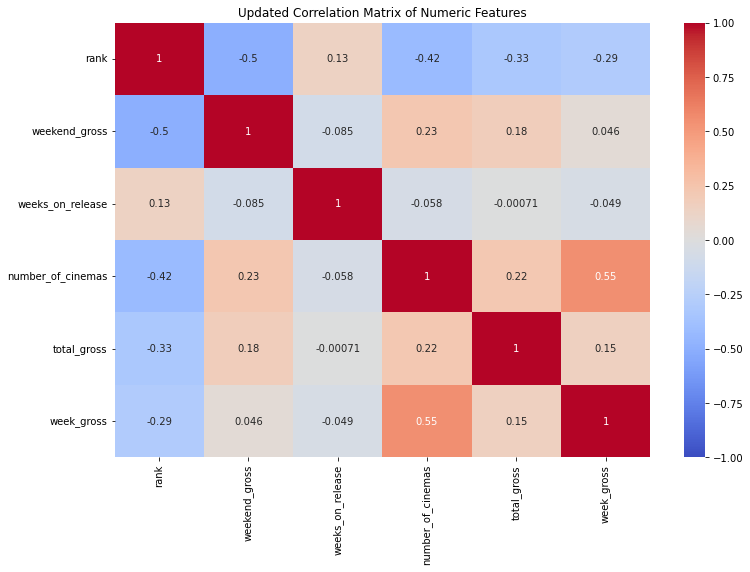

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Recompute the correlation between numeric features
correlation_matrix_updated = data[numeric_features].corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_updated, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Updated Correlation Matrix of Numeric Features')
plt.show()

In [51]:
from sklearn.decomposition import PCA

# 2. Feature extraction using PCA

# Since PCA is more sensitive to numeric features, we first select the numeric features
numeric_data = data[numeric_features]

# Use PCA to retain 90% of the variance
pca = PCA(0.90)
data_pca = pca.fit_transform(numeric_data)

# Output the number of principal components after PCA
num_components = data_pca.shape[1]
num_components

4

In [52]:
type(data_pca)

numpy.ndarray

In [53]:
data_pca_df = pd.DataFrame(data_pca)
data_pca_df.head()

,0,1,2,3
0,0.194381,-0.343997,-0.759225,0.781968
1,0.073927,-0.374667,-0.816759,0.669575
2,0.005629,-0.386773,-0.828981,0.610067
3,-0.120362,-0.419196,-0.890224,0.492567
4,-0.147632,-0.361240,-0.876260,0.483760


In [54]:
# 3. Feature selection based on domain knowledge

selected_features = ['weekend_gross', 'weeks_on_release', 'number_of_cinemas']
data_selected = data[selected_features]

data_selected.head()

,weekend_gross,weeks_on_release,number_of_cinemas
0,-0.285948,-0.139613,-0.622276
1,-0.285948,-0.139613,-0.622276
2,-0.285948,-0.139613,-0.622276
3,-0.300860,-0.139613,-0.622276
4,-0.302893,-0.084291,-0.622276


In [55]:
data_selected_df = pd.DataFrame(data_selected)
data_selected_df.head()

,weekend_gross,weeks_on_release,number_of_cinemas
0,-0.285948,-0.139613,-0.622276
1,-0.285948,-0.139613,-0.622276
2,-0.285948,-0.139613,-0.622276
3,-0.300860,-0.139613,-0.622276
4,-0.302893,-0.084291,-0.622276


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Datasets and their names
datasets = {
     #'Original Data': data_encoded_df.drop(['date', 'film'], axis=1),
    'PCA Data': data_pca_df,
    'Selected Features': data_selected_df
}

# Models and their names
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}

# To store the results
results = {}

# Loop over each dataset
for dataset_name, dataset in datasets.items():
    # Split the data
    X = dataset
    y = data['total_gross']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Loop over each model
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Compute the MSE
        mse = mean_squared_error(y_test, y_pred)
        
        # Store the result
        results[(dataset_name, model_name)] = mse

results

{('PCA Data', 'Linear Regression'): 0.009299504164115683,
 ('PCA Data', 'Decision Tree Regressor'): 0.009550224009025853,
 ('PCA Data', 'Random Forest Regressor'): 0.0048990563851066,
 ('Selected Features', 'Linear Regression'): 0.009853342604436464,
 ('Selected Features', 'Decision Tree Regressor'): 0.009083830790520834,
 ('Selected Features', 'Random Forest Regressor'): 0.006326322250675879}

In [31]:
models_ori = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}
results_ori = {}

# Extract features and target from the encoded dataset
X = data_encoded_df.drop(['date', 'film', 'total_gross'], axis=1)
y = data_encoded_df['total_gross']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over each model
for model_name, model in models_ori.items():
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute the MSE
    mse = mean_squared_error(y_test, y_pred)

    # Store the result
    results_ori[model_name] = mse

results_ori

{('PCA Data', 'Linear Regression'): 0.009299504164115683,
 ('PCA Data', 'Decision Tree Regressor'): 0.009550224009025853,
 ('PCA Data', 'Random Forest Regressor'): 0.0048990563851066,
 ('Selected Features', 'Linear Regression'): 1.4842488503646654e+19,
 ('Selected Features', 'Decision Tree Regressor'): 0.41569004056700737,
 ('Selected Features', 'Random Forest Regressor'): 0.23763999978209244}